In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

---

### Farrell

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,dataset_name,organ,organism,platform,probabilistic_breadth
ZFB_WT_DS3_AATTACGCCCCG,Farrell,Atlas,Danio rerio,Drop-seq,-0.230581316654869
ZFB_WT_DS3_ATCACTGTAGGG,Farrell,Atlas,Danio rerio,Drop-seq,-0.224356675517054
ZFB_WT_DS3_CACAATTCTGTG,Farrell,Atlas,Danio rerio,Drop-seq,-0.226735042435708
ZFB_WT_DS3_CGGCTCTGCCCN,Farrell,Atlas,Danio rerio,Drop-seq,-0.222520695474786
ZFB_WT_DS3_CGTGCCAACATC,Farrell,Atlas,Danio rerio,Drop-seq,-0.199124582559185


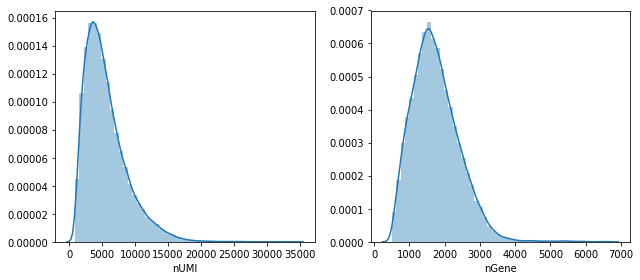

In [2]:
farrell = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Farrell/data.h5")
utils.peek(farrell, "Farrell")
farrell = farrell.normalize()
farrell.obs.head()

In [3]:
farrell_model = cb.directi.fit_DIRECTi(
    farrell, farrell.uns["seurat_genes"],
    **fixed_model_kwargs,
    path="/tmp/cb/db/Farrell/model_0"
)
farrell.latent = farrell_model.inference(farrell)

[DIRECTi epoch 0] train=2.619, val=1.656, time elapsed=3.6s Best save...
[DIRECTi epoch 1] train=1.249, val=1.883, time elapsed=2.3s
[DIRECTi epoch 2] train=1.181, val=1.407, time elapsed=2.3s Best save...
[DIRECTi epoch 3] train=1.172, val=1.193, time elapsed=2.2s Best save...
[DIRECTi epoch 4] train=1.159, val=1.165, time elapsed=2.2s Best save...
[DIRECTi epoch 5] train=1.140, val=1.146, time elapsed=2.2s Best save...
[DIRECTi epoch 6] train=1.126, val=1.136, time elapsed=2.3s Best save...
[DIRECTi epoch 7] train=1.118, val=1.129, time elapsed=2.3s Best save...
[DIRECTi epoch 8] train=1.109, val=1.112, time elapsed=2.3s Best save...
[DIRECTi epoch 9] train=1.100, val=1.103, time elapsed=2.3s Best save...
[DIRECTi epoch 10] train=1.093, val=1.105, time elapsed=2.3s
[DIRECTi epoch 11] train=1.088, val=1.097, time elapsed=2.2s Best save...
[DIRECTi epoch 12] train=1.084, val=1.093, time elapsed=2.3s Best save...
[DIRECTi epoch 13] train=1.079, val=1.085, time elapsed=2.3s Best save...


In [4]:
farrell.obs["probabilistic_breadth"] = farrell.obs["probabilistic_breadth"].astype(np.float)

[  Info   ] Computing tSNE...


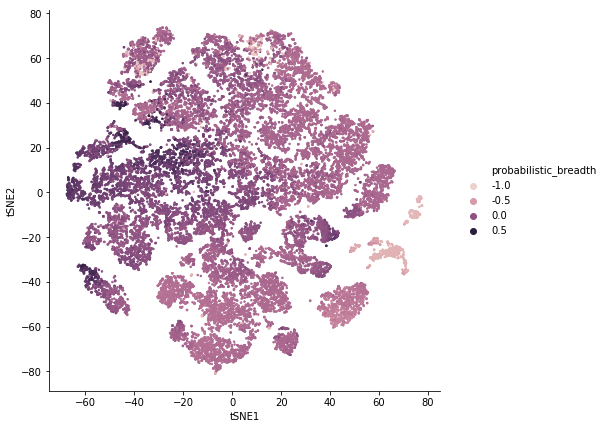

In [5]:
plot = farrell.visualize_latent("probabilistic_breadth")
plot.get_figure().savefig("Farrell/probabilistic_breadth.pdf", bbox_inches="tight")

In [6]:
%%capture capio
farrell_models = [farrell_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    farrell_models.append(cb.directi.fit_DIRECTi(
        farrell, farrell.uns["seurat_genes"],
        **fixed_model_kwargs, 
        random_seed=i, path="/tmp/cb/db/Farrell/model_%d" % i
    ))
farrell_blast = cb.blast.BLAST(farrell_models, farrell, 
                                               keep_exprs=True).build_empirical()
farrell_blast.save("Farrell")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Farrell/model_1/checkpoint-118
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Farrell/model_2/checkpoint-168
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Farrell/model_3/checkpoint-152


In [7]:
with open("Farrell/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Farrell/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [8]:
utils.self_projection(farrell_blast, "Farrell")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


ValueError: Unknown names encountered!